# Look at our data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATAPATH = Path('..\data\interim')
DATAPATH.exists()

plt.style.use('default')
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [2]:
un = pd.read_pickle(DATAPATH / 'UN.pickle')
uw= pd.read_pickle(DATAPATH / 'UW.pickle')
ln = pd.read_pickle(DATAPATH / 'LN.pickle')
jt = pd.read_pickle(DATAPATH / 'JT.pickle')
markets = {'UN': un, 'UW': uw, 'LN': ln, 'JT': jt}

## Overlapping Columns
This may be due to different stocks using the same ticket

In [3]:
un_uw_overlap = set(un.columns).intersection(uw.columns)
print(f"UN - UW overlapping columns: {len(un_uw_overlap)}")
un_ln_overlap = set(un.columns).intersection(ln.columns)
print(f"UN - LN overlapping columns: {len(un_ln_overlap)}")
un_jt_overlap = set(un.columns).intersection(jt.columns)
print(f"UN - JT overlapping columns: {len(un_jt_overlap)}")
uw_ln_overlap = set(uw.columns).intersection(ln.columns)
print(f"UW - LN overlapping columns: {len(uw_ln_overlap)}")
uw_jt_overlap = set(uw.columns).intersection(jt.columns)
print(f"UW - JT overlapping columns: {len(uw_jt_overlap)}")
ln_jt_overlap = set(ln.columns).intersection(jt.columns)
print(f"LN - JT overlapping columns: {len(ln_jt_overlap)}")

UN - UW overlapping columns: 0
UN - LN overlapping columns: 202
UN - JT overlapping columns: 0
UW - LN overlapping columns: 77
UW - JT overlapping columns: 0
LN - JT overlapping columns: 0


## Missing Values
Returns are not given for every stock every day. The number of stocks entering the dataset is increasing over time. Holes indicate prevalently holidays during which the stock market is closed. 

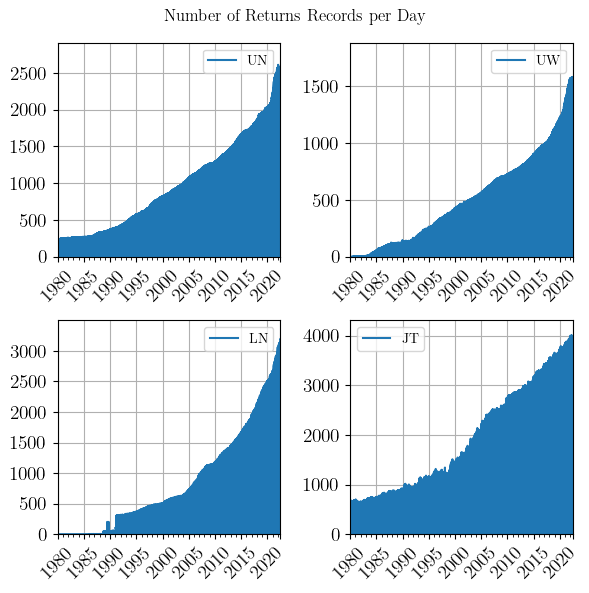

In [14]:
def plot_returns_count(df, name, ax):
    df.count(axis=1).plot(ax=ax, label=name, legend=True, rot=45, fontsize=14)
    ax.set_ylim(0, df.count(axis=1).max() + 300)
    ax.grid()
    return ax

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
fig.suptitle('Number of Returns Records per Day')

for ax, (name, market_df) in zip(axs.flat, markets.items()):
    plot_returns_count(market_df, name, ax)
        
plt.tight_layout()
plt.show()

In [15]:
fig.savefig('../visualization/exploration/returns_records_per_day.png')

## Distribution of Returns

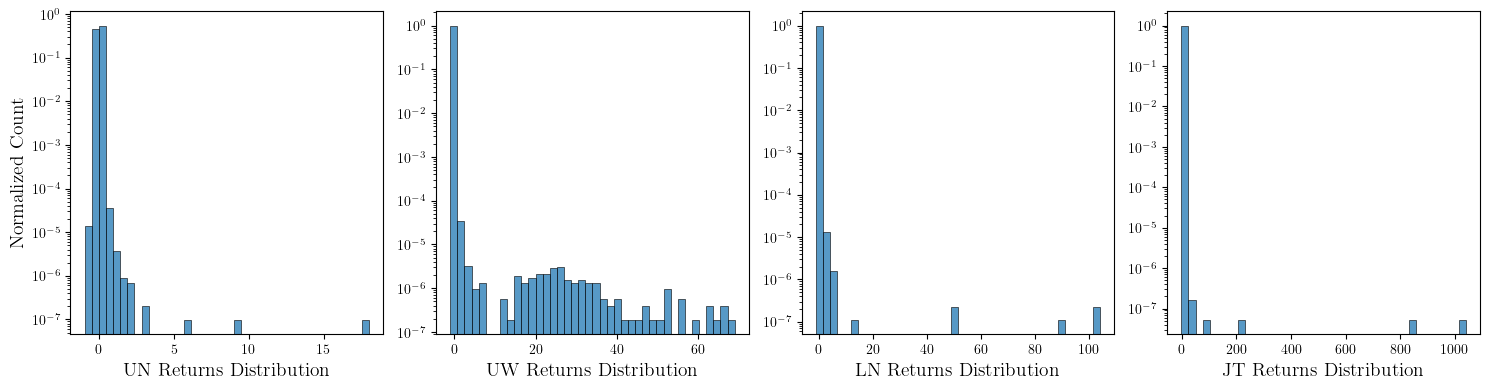

In [16]:
plt.close('all')

def plot_hist(df, name, ax):
    df = df.melt(var_name='stock', value_name='return')
    
    sns.histplot(data=df, x='return', bins=40, stat='probability', log_scale=(False, True), ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(f"{name} Returns Distribution", fontsize=14)
    return ax

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
for ax, (name, market_df) in zip(axs, markets.items()):
    plot_hist(market_df, name, ax)

axs[0].set_ylabel('Normalized Count', fontsize=14)

plt.tight_layout()
plt.show()

In [20]:
fig.savefig('../visualization/exploration/returns_distribution.png')    

## Percentage of Negative Returns

In [19]:
def negative_returns(df):
    return (df < 0).sum().sum() / df.count().sum()

def positive_returns(df):
    return (df > 0).sum().sum() / df.count().sum()

def zero_returns(df):
    return (df == 0).sum().sum() / df.count().sum()

def nan_returns(df):
    return df.isna().sum().sum() / df.count().sum()

print("Positive - Negative - Zero Returns")
for df_name in markets.keys():
    
    positives = positive_returns(markets[df_name])
    negatives = negative_returns(markets[df_name])
    zeros = zero_returns(markets[df_name])
    print(f"{df_name}: {positives :.2%} - {negatives :.2%} - {zeros :.2%} = {positives + negatives + zeros:.2%}")
    print(f"Negative/Positive Rateo: {negatives/positives:.2f}")

Positive - Negative - Zero Returns
UN: 47.98% - 46.18% - 5.85% = 100.00%
Negative/Positive Rateo: 0.96
UW: 48.02% - 47.30% - 4.68% = 100.00%
Negative/Positive Rateo: 0.98
LN: 34.75% - 34.44% - 30.81% = 100.00%
Negative/Positive Rateo: 0.99
JT: 43.52% - 45.43% - 11.05% = 100.00%
Negative/Positive Rateo: 1.04
